<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/Module_4_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0

Downloading...
From: https://drive.google.com/uc?id=1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.3MB/s]


In [2]:
!gdown 1AF9ahO_3AWgikqoME0tlMFfhp5XEPU0H

Downloading...
From: https://drive.google.com/uc?id=1AF9ahO_3AWgikqoME0tlMFfhp5XEPU0H
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 74.6MB/s]


Bài tập 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# prepare dataset
data = np.genfromtxt('/content/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X - avg) / (maxi - mini)
  x_b = np.c_[np.ones(N), X]
  return x_b, maxi, mini, avg

# x_b = np.hstack((np.ones((N, 1)), X))
# x_b
X_b, maxi, mini, avg = mean_normalization(X)


In [5]:
def stochastic_gradient_descent(X_b, y, learning_rate=1e-5, n_epochs=50):
  theta = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
  [0.29763545]])

  theta_path = [theta]
  m = len(X_b)
  losses = []

  for epoch in range(n_epochs):
    for i in range(m):
      random_index = i
      xi = X_b[random_index: random_index+1] # Take row 1
      yi = y[random_index:random_index+1 ]

      # Compute output
      y_hat = xi.dot(theta)

      # Compute loss
      loss = (y_hat - yi) * (y_hat - yi) / 2
      losses.append(loss[0][0])

      # Compute gradient
      # gradient = 2*(y_hat - yi) * xi
      gradient = xi.T.dot(y_hat - yi)

      # Update theta
      theta = theta - learning_rate * gradient

      theta_path.append(theta)

  return theta_path, losses

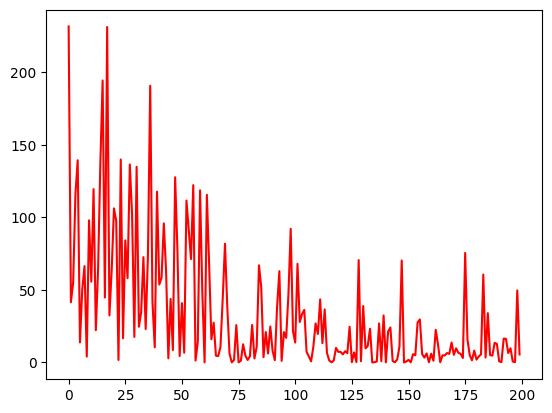

In [6]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y, n_epochs =1 , learning_rate=0.01)


plt.plot(losses, color ="r")
plt.show()

In [7]:
np.sum(losses)

6754.643359356192

In [8]:
def mini_batch_gradient_descent(X_b, y, learning_rate=1e-5, n_epochs=50, minibatch_size =
20):
  theta = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
  [0.29763545]])
  theta_path = [theta]
  m = len(X_b)
  losses = []
  for epoch in range(n_epochs):
    shuffled_indices = np.asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
    X_b_shuffled = X_b [ shuffled_indices ]
    y_shuffled = y [ shuffled_indices ]
    for i in range(0, m, minibatch_size):
      xi = X_b_shuffled [ i : i + minibatch_size ]
      yi = y_shuffled [ i: i + minibatch_size ]
      # Compute output
      y_hat = np.dot(xi, theta)
      # y_hat = xi * theta

      # Compute loss
      # loss = (y_hat - yi) ** (y_hat - yi)
      loss = (y_hat - yi) ** 2 / 2
      losses.append(np.sum(loss)/minibatch_size)

      # Compute gradient
      #gradient = 2*(y_hat - yi) * xi
      gradient = xi.T.dot((y_hat - yi)/minibatch_size)
      # Update theta
      theta = theta - learning_rate * gradient

      theta_path.append(theta)

  return theta_path, losses


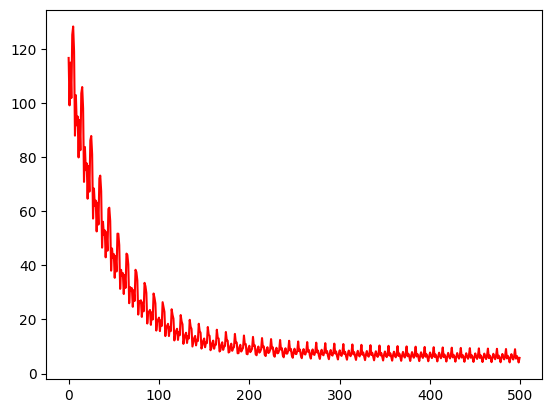

In [9]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)

x_axis = list ( range (200) )
plt . plot (losses , color ="r")
plt . show ()

In [10]:
# learning_rate=1e-5
# n_epochs=50
# minibatch_size = 20
# theta = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
# theta_path = [theta]
# m = len(X_b)
# losses = []

# for epoch in range(5):
#     shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
#                                    132, 179, 155, 36, 191, 182, 170, 27, 35,
#                                    162, 25, 28, 73, 172, 152, 102, 16, 185,
#                                    11, 1, 34, 177, 29, 96, 22, 76, 196, 6,
#                                    128, 114, 117, 111, 43, 57, 126, 165, 78,
#                                    151, 104, 110, 53, 181, 113, 173, 75, 23,
#                                    161, 85, 94, 18, 148, 190, 169, 149, 79,
#                                    138, 20, 108, 137, 93, 192, 198, 153, 4,
#                                    45, 164, 26, 8, 131, 77, 80, 130, 127,
#                                    125, 61, 10, 175, 143, 87, 33, 50, 54,
#                                    97, 9, 84, 188, 139, 195, 72, 64, 194,
#                                    44, 109, 112, 60, 86, 90, 140, 171, 59,
#                                    199, 105, 41, 147, 92, 52, 124, 71, 197,
#                                    163, 98, 189, 103, 51, 39, 180, 74, 145,
#                                    118, 38, 47, 174, 100, 184, 183, 160, 69,
#                                    91, 82, 42, 89, 81, 186, 136, 63, 157,
#                                    46, 67, 129, 120, 116, 32, 19, 187, 70,
#                                    141, 146, 15, 58, 119, 12, 95, 0, 40,
#                                    83, 24, 168, 150, 178, 49, 159, 7, 193,
#                                    48, 30, 14, 121, 5, 142, 65, 176, 101,
#                                    55, 133, 13, 106, 66, 99, 68, 135, 158,
#                                    88, 62, 166, 156, 2, 134, 56, 123, 122,
#                                    154])
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]

#     for i in range(0, m, minibatch_size):
#         xi = X_b_shuffled[i:i + minibatch_size]
#         yi = y_shuffled[i:i + minibatch_size]

#         # Compute output
#         y_hat = np.dot(xi, theta)

#         # Compute loss
#         loss = (y_hat - yi) ** (y_hat - yi)
#         print(loss)
#         loss = (y_hat - yi) ** 2 / 2
#         print(loss)
#         losses.append(np.sum(loss) / minibatch_size)

#         # Compute gradient
#         gradient = 2*(y_hat - yi) * xi
#         print(gradient)
#         gradient = xi.T.dot((y_hat - yi) / minibatch_size)
#         print(gradient)

#         # Update theta
#         theta = theta - learning_rate * gradient

#         theta_path.append(theta)


In [11]:
sum(losses)

8865.64805883732

In [12]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
  theta = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,
  [0.29763545]])
  theta_path = [theta]
  m = len(X_b)
  losses = []
  for epoch in range(n_epochs):
    # Compute output
    y_hat = X_b.dot(theta)

    # Compute loss
    loss = (y_hat - y) ** 2

    # losses.append(np.sum(loss) / m)

    # Compute gradient
    gradient = X_b.T.dot(2*(y_hat - y)/m)

    # Update theta
    theta = theta - learning_rate * gradient

    mean_loss = np.sum(loss) / m
    losses.append(mean_loss)
    theta_path.append(theta)

  return theta_path, losses

In [13]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =50 , learning_rate =0.01)

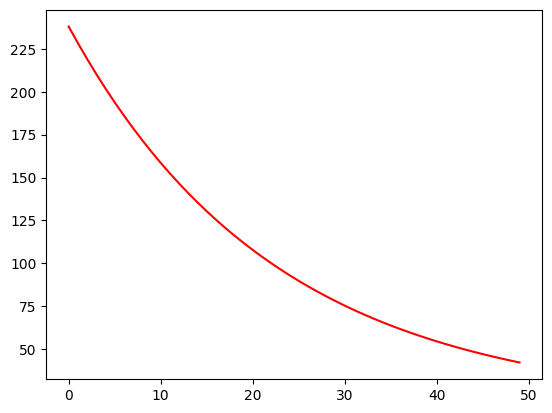

In [14]:
plt.plot(losses, color ="r")
plt.show()

Bài tập 2

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/content/BTC-Daily.csv')
df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [41]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].min()) + ' - ' + str(df['date'].max())
print(date_range)

2014-11-28 00:00:00 - 2022-03-01 00:00:00


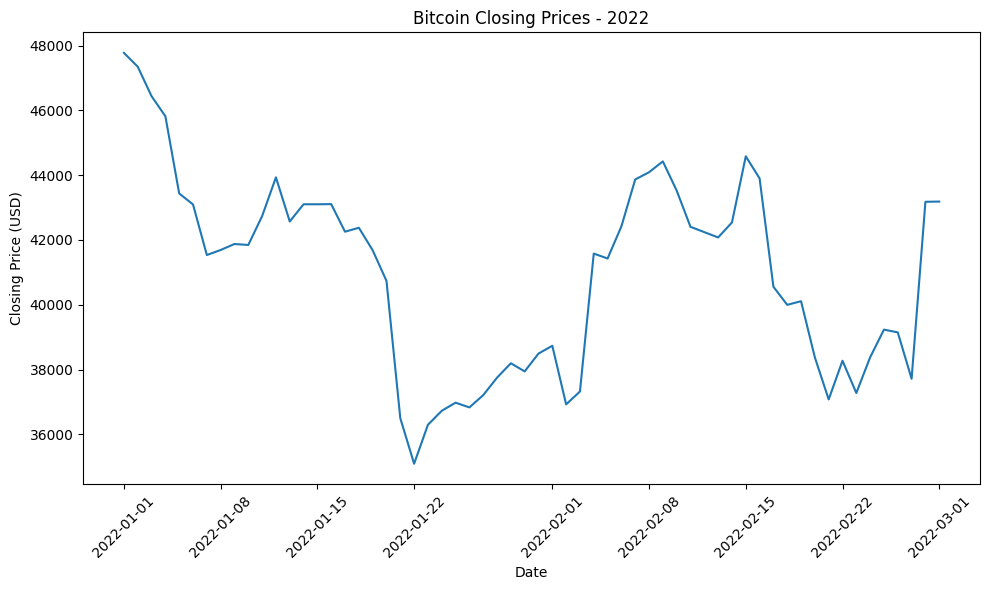

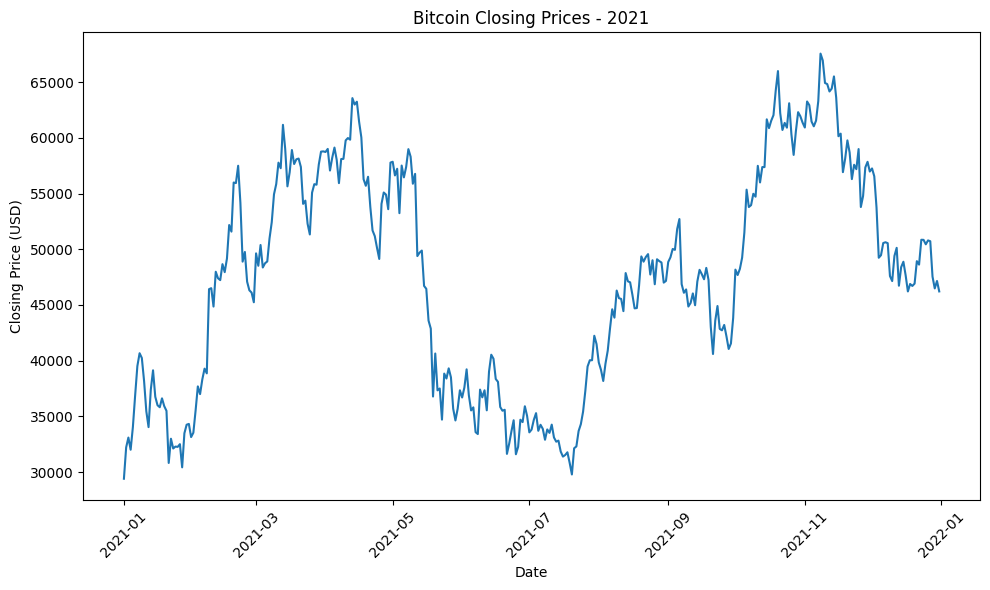

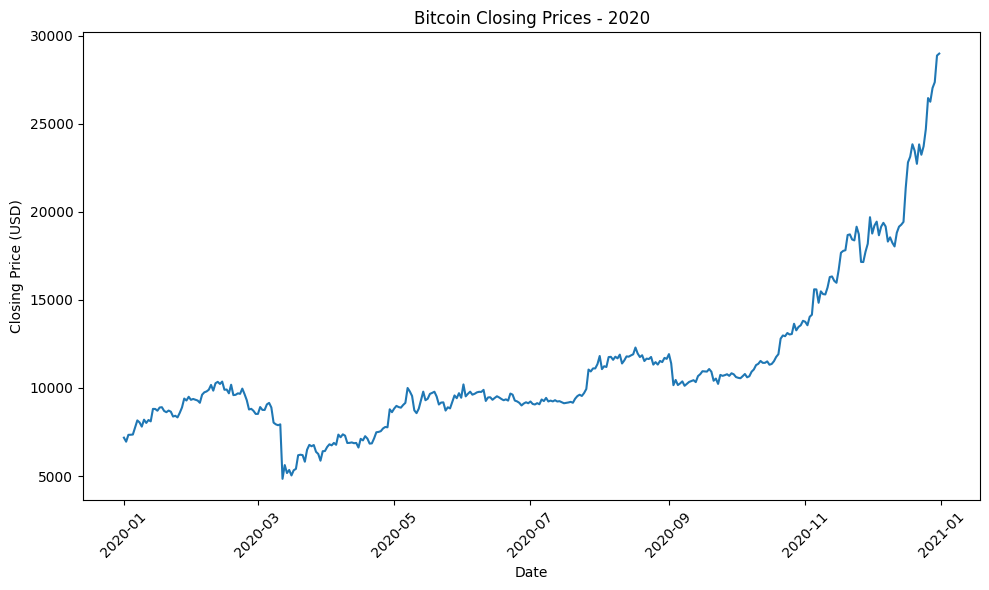

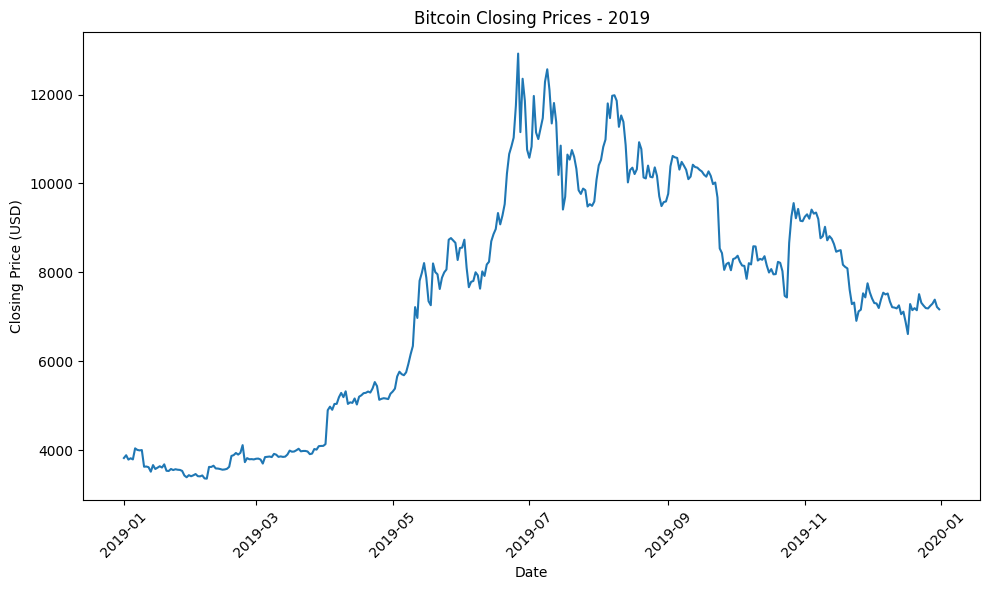

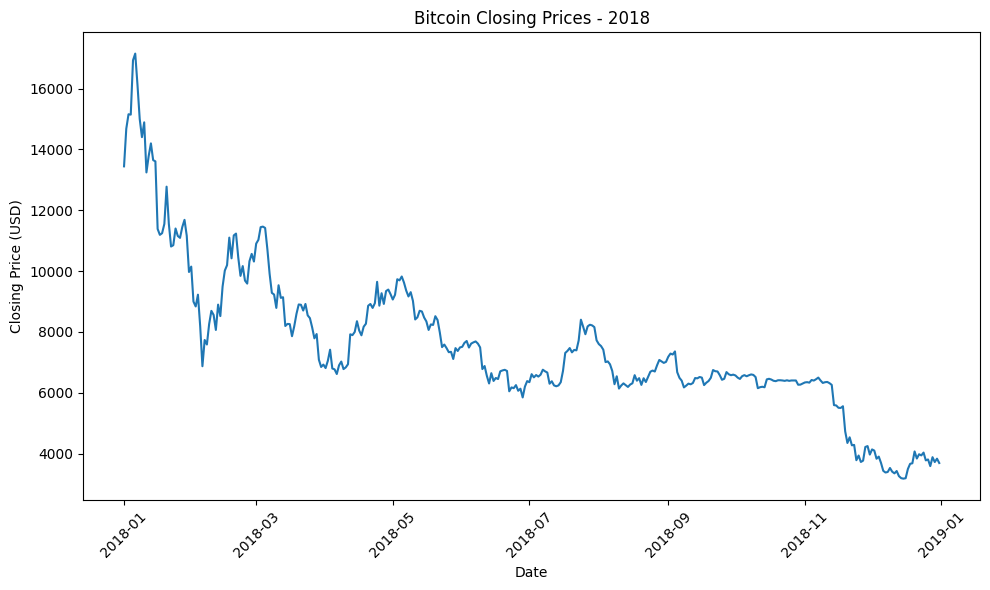

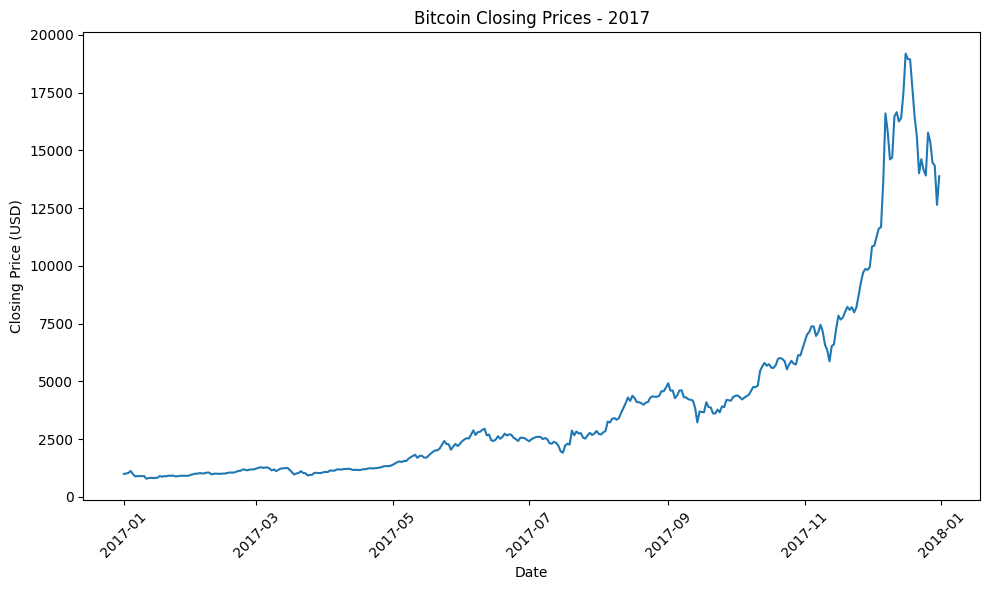

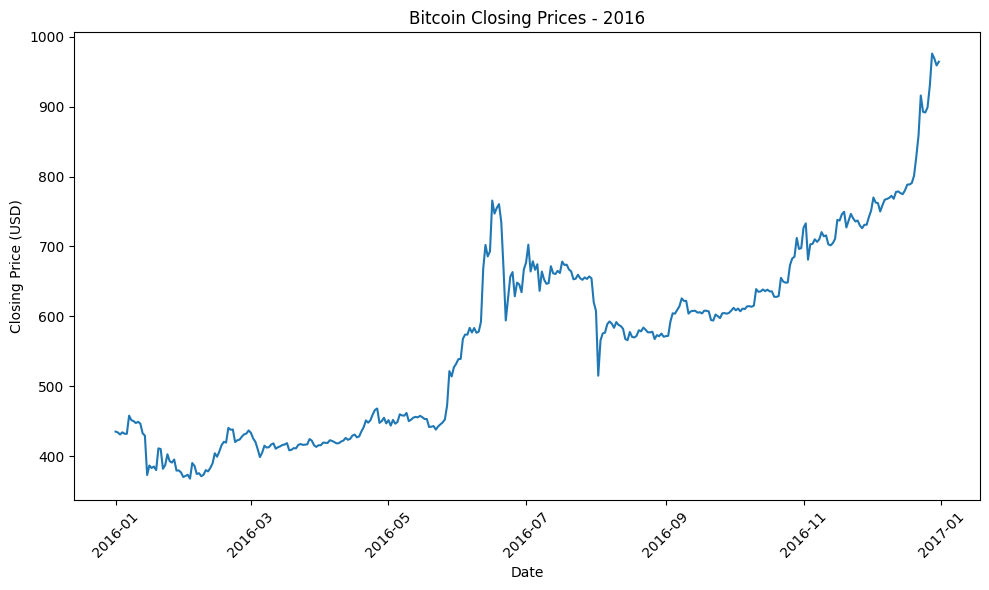

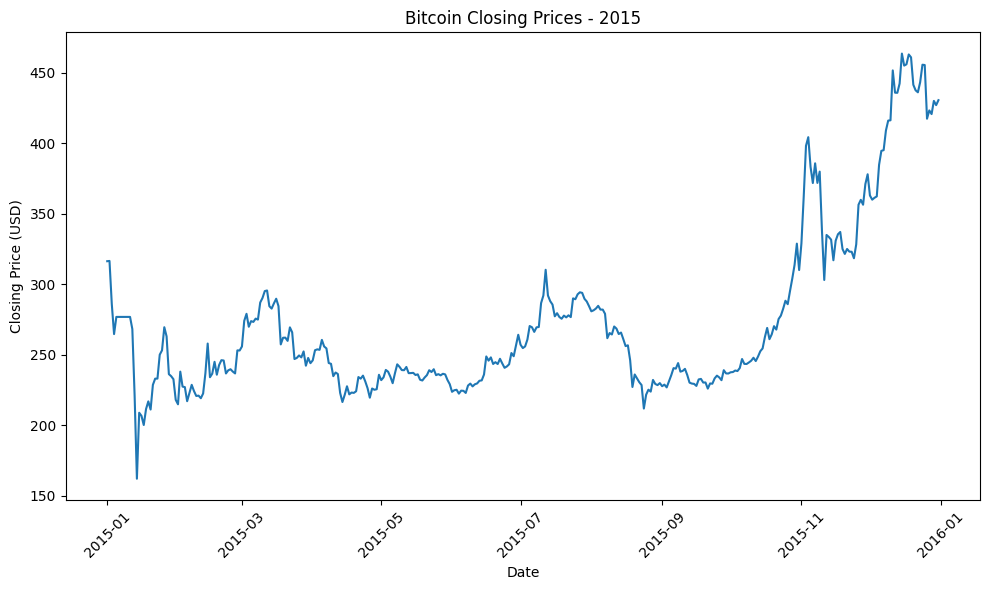

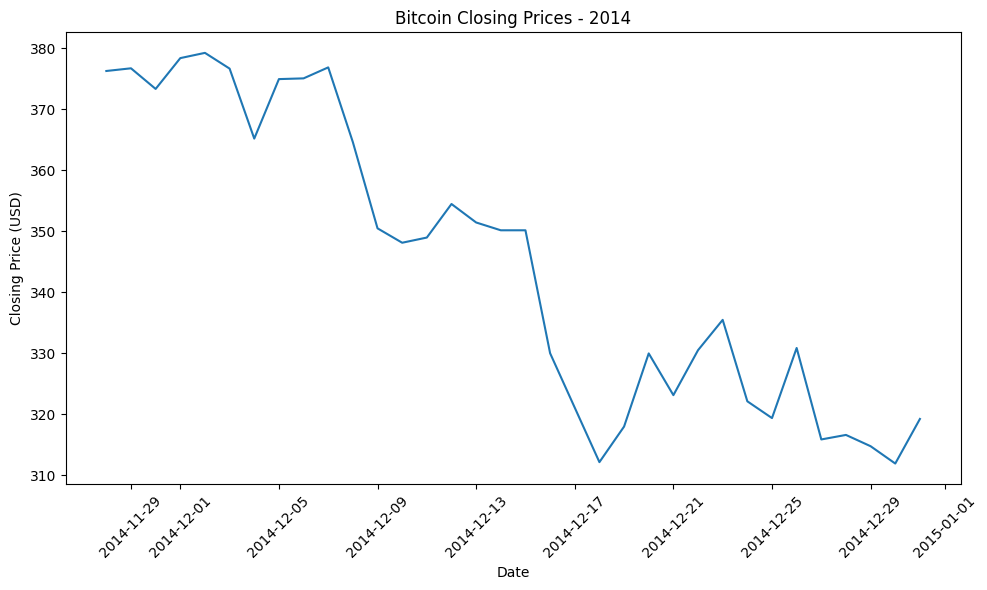

In [42]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
unique_years = df['year'].unique()
for year in unique_years:
  dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
  year_month_day = pd.DataFrame({'date': dates})
  year_month_day['year'] = year_month_day['date'].dt.year
  year_month_day['month'] = year_month_day['date'].dt.month
  year_month_day['day'] = year_month_day['date'].dt.day

  merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
  # Plot dữ liệu cho từng năm
  plt.figure(figsize=(10, 6))
  plt.plot(merged_data['date_x'], merged_data['close'], label=f'{year}')

  # Thiết lập tiêu đề và nhãn
  plt.title(f'Bitcoin Closing Prices - {year}')
  plt.xlabel('Date')
  plt.ylabel('Closing Price (USD)')

    # Xoay trục x để các nhãn ngày dễ đọc
  plt.xticks(rotation=45)

    # Điều chỉnh bố cục đồ thị
  plt.tight_layout()

    # Hiển thị biểu đồ
  plt.show()

<ipython-input-43-723b82404345>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


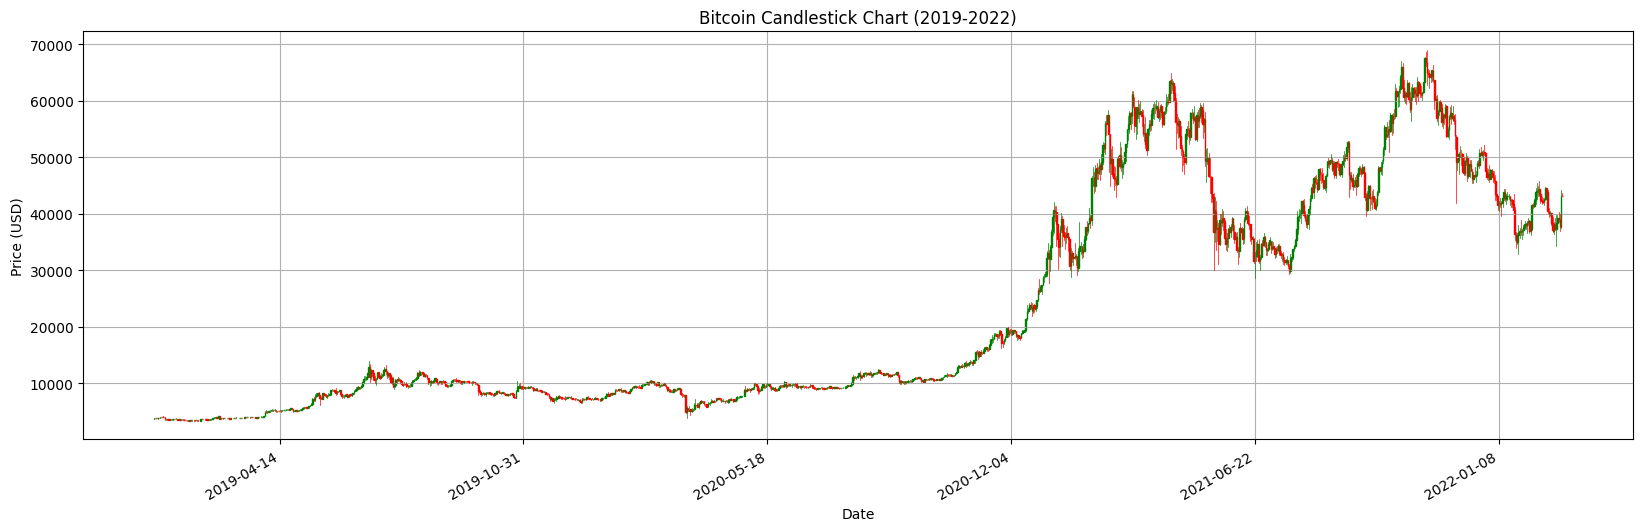

In [43]:
!pip install mplfinance
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


In [20]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,2022,3,1
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,2022,2,28
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,2022,2,27
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,2022,2,26
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,2022,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014,12,2
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014,12,1
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014,11,30
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014,11,29


In [65]:
def predict(X, w, b):
  num_features = w.shape[0]
  if X.shape[1] != num_features:
    # If mismatch, raise an error with detailed info
    raise ValueError(f"Input data has {X.shape[1]} features, but the model expects {num_features} features. "
                     f"Expected features: {['feature_1', 'feature_2', 'feature_3', 'feature_4']} "  # Replace with your actual feature names
                     f"Provided features: {X.columns.tolist()}")

  return X.dot(w) + b

In [45]:
def gradient(y_hat, y, x):
  loss = y_hat - y
  dw = x.T.dot(loss) / len(y)
  db = np.sum(loss) /len(y)
  cost = np.sum(loss ** 2) / (2 * len(y))
  return dw, db, cost

In [46]:
def update(w, b, dw, db, learning_rate):
  w = w - learning_rate * dw
  b = b - learning_rate * db
  return w, b

In [56]:
def linear_regression_vectorize(X, y, learning_rate=0.01, num_iterations=200):
  n_samples, n_features = X.shape
  w = np.zeros((n_features))
  b = 0
  losses = []
  for _ in range(num_iterations):
    y_hat = predict(X, w, b)
    dw, db, cost = gradient(y_hat, y, X)
    w, b = update(w, b, dw, db, learning_rate)
    losses.append(cost)
  return w, b, losses



In [25]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD', 'year', 'month', 'day'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Standardized_Close_Prices'] = scaler.fit_transform(df[['close']].values.reshape(-1, 1))
df['Standardized_Open_Prices'] = scaler.fit_transform(df[['open']].values.reshape(-1, 1))
df['Standardized_High_Prices'] = scaler.fit_transform(df[['high']].values.reshape(-1, 1))
df['Standardized_Low_Prices'] = scaler.fit_transform(df[['low']].values.reshape(-1, 1))


In [49]:
# Converting Date to numerical form
df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

X = df[['Standardized_Open_Prices', 'Standardized_High_Prices', 'Standardized_Low_Prices', 'Standardized_Close_Prices']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
X_train.shape
y_train.shape

(1776,)

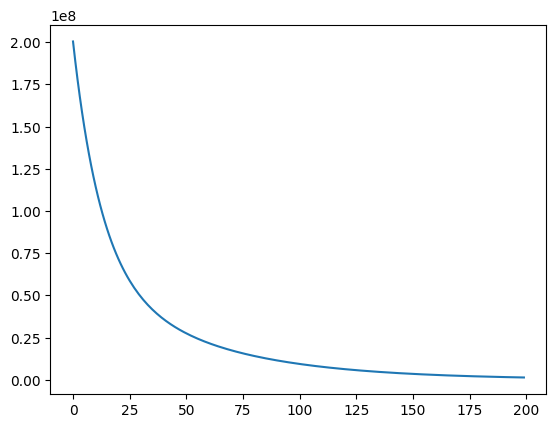

In [57]:
w, b, losses = linear_regression_vectorize(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)
plt.plot(losses)
plt.show()

In [58]:
losses[:5]

[200471755.39818874,
 188751786.70338276,
 177873708.683236,
 167772855.21210253,
 158389618.5717433]

In [60]:
w

array([4042.75122402, 4064.49439889, 4066.66991079, 4082.90078236])

In [61]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

1.0

In [63]:
y_pred = predict(X_test.values, w, b)
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
mae = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 1613.3490463097307
MAE: 1576.2552337448108
MAPE: 143.62465187267014


In [66]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

# Predict close prices
y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')

# Customize the plot
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Input data has 3 features, but the model expects 4 features. Expected features: ['feature_1', 'feature_2', 'feature_3', 'feature_4'] Provided features: ['open', 'high', 'low']